In [15]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras import losses
import tensorflow.keras as tfk
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Dense,Conv2D,Conv1D,AveragePooling2D,MaxPool2D,BatchNormalization,Dropout,Flatten

In [ ]:

feeling = 'angry fear happy neutral sad surprise'.split()
files = ['test\\','train\\']
data = pd.DataFrame(columns=['Image','Emotion'])
l = 0
for i in files:
    for j in range(len(feeling)):
        for x in os.listdir(i+feeling[j]):
            image = Image.open(i+feeling[j]+'\\'+x)
            image = np.array(image).astype(np.float32)/255.0
            data.loc[l] = [image,j]
            l +=1

In [17]:
data = data.sample(frac=1,random_state=48)
data.head()

,Image,Emotion
13418,"[[0.23921569, 0.23921569, 0.24313726, 0.254901...",1
14439,"[[0.12156863, 0.0, 0.0, 0.011764706, 0.0235294...",1
20527,"[[0.61960787, 0.6392157, 0.61960787, 0.627451,...",2
31807,"[[0.09803922, 0.07450981, 0.078431375, 0.09019...",4
212,"[[0.41960785, 0.41960785, 0.4392157, 0.4705882...",0


Text(0.5, 1.0, '2')

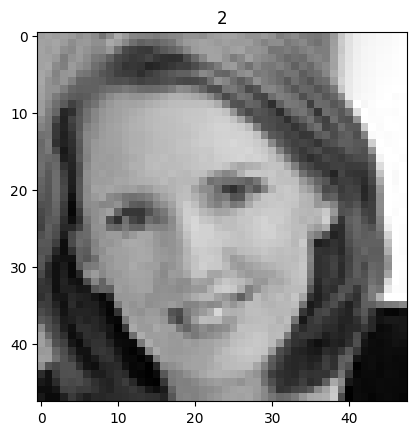

In [18]:
plt.imshow(data['Image'].iloc[2],cmap='gray')
plt.title(f'{data.Emotion.iloc[2]}')

In [19]:
x = data['Image'].values
x = np.concatenate(x)
x = x.reshape(-1,48,48,1)
x.shape

(35340, 48, 48, 1)

In [20]:
y = data['Emotion'].__array__()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=48)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((24738, 48, 48, 1), (10602, 48, 48, 1), (24738,), (10602,))

In [28]:
def build_model(input_shape):
    input = tfk.Input(input_shape)
    con = Conv2D(32,(3,3),activation='relu')(input)
    pool = MaxPool2D((2,2),padding='same')(con)
    batch = BatchNormalization()(pool)
    drop = Dropout(0.2)(batch)
    
    con = Conv2D(64,(3,3),activation='relu')(drop)
    pool = MaxPool2D((2,2),padding='same')(con)
    batch = BatchNormalization()(pool)
    drop = Dropout(0.2)(batch)
    
    
    con = Conv2D(128,(3,3),activation='relu')(drop)
    pool = MaxPool2D((2,2),padding='same')(con)
    batch = BatchNormalization()(pool)
    drop = Dropout(0.2)(batch)

    
    con = Conv2D(256,(3,3),activation='relu')(drop)
    pool = MaxPool2D((2,2),padding='same')(con)
    batch = BatchNormalization()(pool)
    drop = Dropout(0.2)(batch)
    
    
    flat = Flatten()(drop)
    dense = Dense(1000,activation='relu')(flat)
    dense = BatchNormalization()(dense)
    drop = Dropout(0.2)(dense)
    
    
    dense = Dense(100,activation='relu')(drop)
    dense = BatchNormalization()(dense)
    drop = Dropout(0.2)(dense)
    
    out = Dense(7,activation='softmax',name='Expression')(drop)
    
    model = tfk.Model(inputs=input,outputs=[out])
    model.compile(loss=["SparseCategoricalCrossentropy"],optimizer="Adam",metrics=["accuracy"])
    return model

In [29]:
model = build_model((48,48,1))
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     1,025,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,519,967 (5.80 MB)

 Trainable params: 1,516,807 (5.79 MB)

 Non-trainable params: 3,160 (12.34 KB)

In [30]:
modelfile='Emotion.keras'
checkp=ModelCheckpoint(modelfile,monitor='val_loss',
                       verbose=1,save_best_only=True,
                       save_weights_only=False,
                       mode='auto',
                       save_freq='epoch')
threshold=EarlyStopping(patience=50,monitor='val_loss',
                                           restore_best_weights='True',
                                           start_from_epoch = 10)

In [31]:
history = model.fit(x_train,y_train,
          batch_size=24,
                validation_data=(x_test,y_test),
                epochs=200,
                shuffle = True,
                steps_per_epoch=len(x_train) // 24,
                callbacks=[checkp,threshold])

model.summary()

Epoch 1/200
764/773 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2865 - loss: 1.9488
Epoch 1: val_loss improved from inf to 1.47992, saving model to Emotion.keras
773/773 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.2873 - loss: 1.9458 - val_accuracy: 0.4295 - val_loss: 1.4799
Epoch 2/200
  1/773 ━━━━━━━━━━━━━━━━━━━━ 2:26:21 11s/step - accuracy: 0.0000e+00 - loss: 1.7233
Epoch 2: val_loss did not improve from 1.47992
773/773 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.0000e+00 - loss: 1.7233 - val_accuracy: 0.3823 - val_loss: 1.6671
Epoch 3/200
764/773 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4408 - loss: 1.4226
Epoch 3: val_loss improved from 1.47992 to 1.32591, saving model to Emotion.keras
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4411 - loss: 1.4220 - val_accuracy: 0.4894 - val_loss: 1.3259
Epoch 4/200
  1/773 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0000e+00 - loss: 1.6581
Epoch 4: val_loss did not improve from 1.32591
773/773 ━━━━━━━━━━━━━━━━━━━━

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     1,025,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,553,583 (17.37 MB)

 Trainable params: 1,516,807 (5.79 MB)

 Non-trainable params: 3,160 (12.34 KB)

 Optimizer params: 3,033,616 (11.57 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


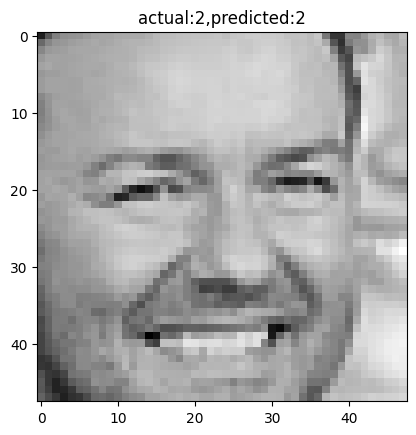

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


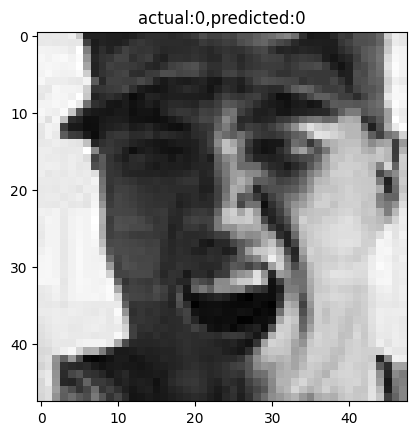

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


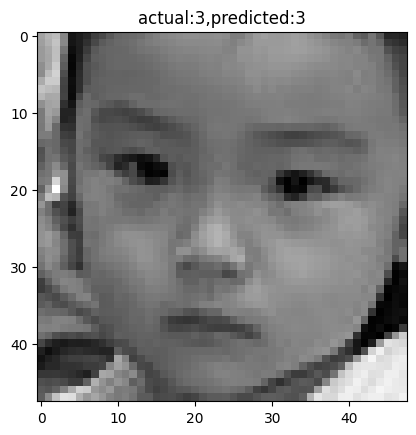

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


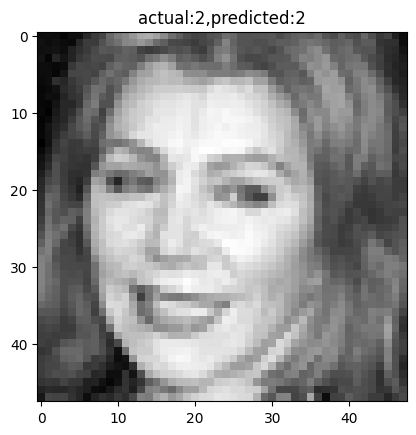

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


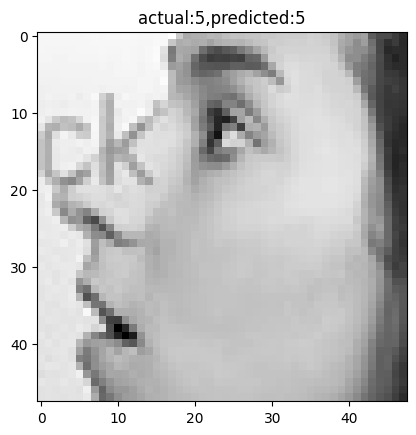

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


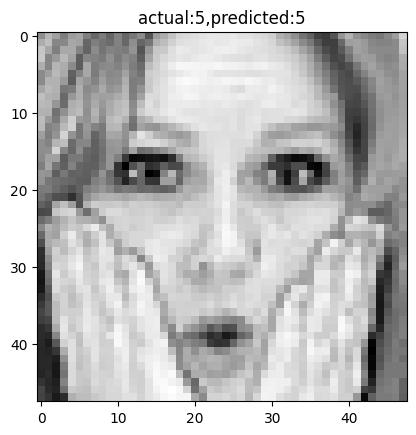

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


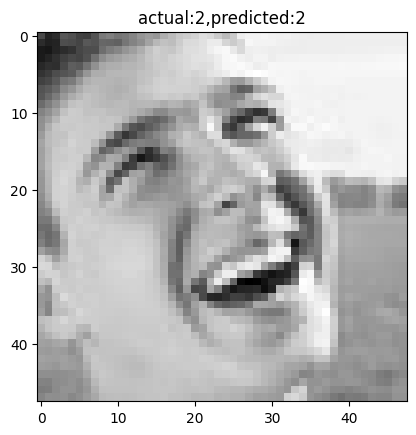

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


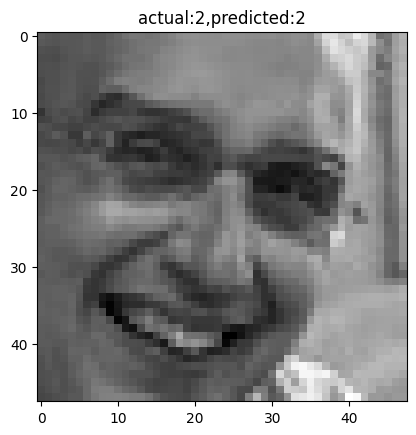

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


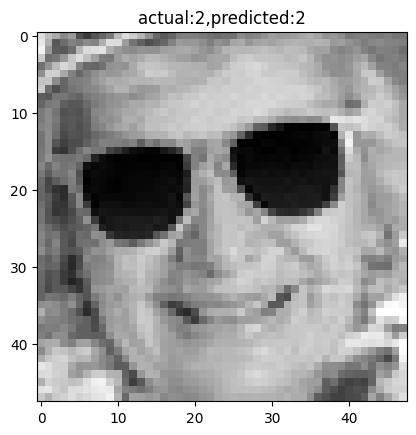

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


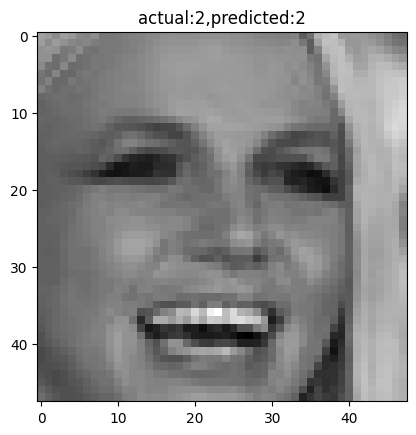

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


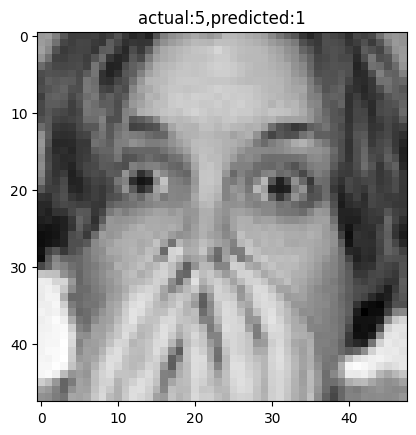

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


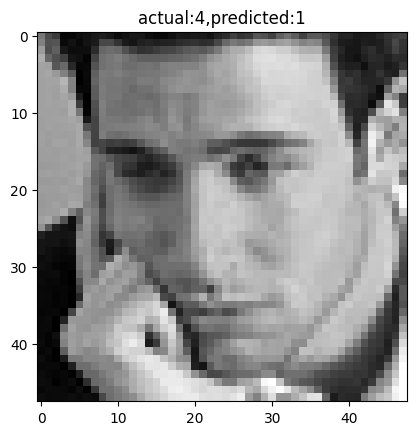

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


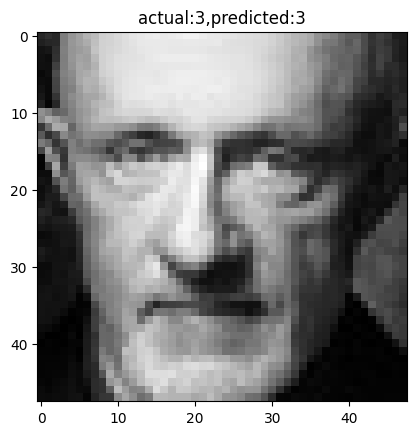

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


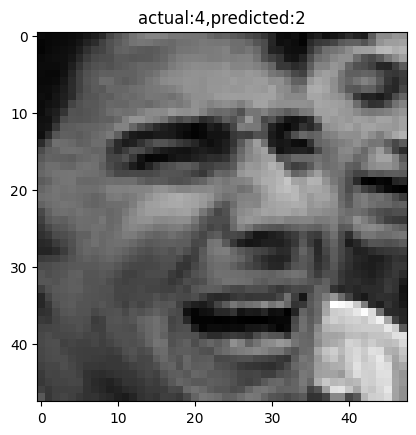

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


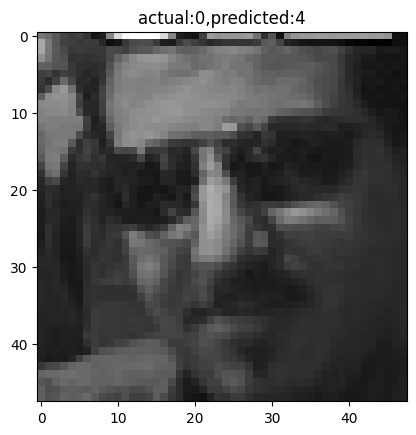

In [32]:
for i in range(15):
    plt.imshow(x_test[i],cmap='gray')
    test = np.expand_dims(x_test[i],axis=0)
    predicted =  model.predict(test)
    plt.title(f'actual:{y_test[i]},predicted:{np.argmax(predicted[0])}')
    # print(y_test[1][i],round(predicted[1][0][0]))
    plt.show()